In [1]:

%matplotlib widget

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df = pd.read_csv('../data/raw/uav_navigation_dataset.csv')

In [4]:
df

,timestamp,latitude,longitude,altitude,imu_acc_x,imu_acc_y,imu_acc_z,imu_gyro_x,imu_gyro_y,imu_gyro_z,lidar_distance,speed,wind_speed,battery_level,obstacle_detected
0,2023-01-01 00:00:00,37.772391,-122.421527,218.138368,-0.001979,1.379990,-2.445775,49.732045,39.381347,-72.391665,33.328274,26.180914,1.768356,79.324416,0
1,2023-01-01 00:00:01,37.783914,-122.419931,199.810443,1.480481,-1.892928,-2.635478,-14.654717,-165.994752,-145.865601,81.765473,17.362926,0.287489,90.488150,0
2,2023-01-01 00:00:02,37.779540,-122.412309,129.269261,0.376001,-0.920162,0.625152,167.219469,40.413723,-134.510679,99.440493,9.886640,14.688221,57.054390,0
3,2023-01-01 00:00:03,37.776873,-122.422600,323.270002,-2.500185,0.979684,2.796698,-101.167758,-147.719302,-114.958394,84.155773,23.416045,5.234081,43.134299,0
4,2023-01-01 00:00:04,37.768020,-122.412007,264.480872,-1.886519,-0.107464,0.016328,31.628310,75.723926,-106.684800,34.941221,15.466953,17.553565,45.507726,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2023-01-01 01:23:15,37.782848,-122.412247,342.897568,2.262232,-1.035078,2.713653,-23.614714,91.452207,-110.369398,62.433297,18.009636,19.322815,51.086532,0
4996,2023-01-01 01:23:16,37.767288,-122.411450,130.009252,-2.719116,1.361798,1.486945,-13.112414,95.229697,-64.997459,23.006261,23.357677,7.464799,51.209710,0
4997,2023-01-01 01:23:17,37.771457,-122.410466,73.057794,-1.177809,2.539645,-2.883265,10.680090,-82.955005,-52.773127,75.025011,25.563181,6.093497,69.327959,0
4998,2023-01-01 01:23:18,37.781215,-122.421450,357.332717,-0.340080,0.823714,-0.593971,168.324582,-23.644882,-76.744064,52.340586,21.246193,8.147251,65.517897,0


In [5]:
# Basic data exploration
print("Dataset Shape:", df.shape)

Dataset Shape: (5000, 15)


In [6]:
print("\nColumns:", df.columns.tolist())


Columns: ['timestamp', 'latitude', 'longitude', 'altitude', 'imu_acc_x', 'imu_acc_y', 'imu_acc_z', 'imu_gyro_x', 'imu_gyro_y', 'imu_gyro_z', 'lidar_distance', 'speed', 'wind_speed', 'battery_level', 'obstacle_detected']


In [7]:
print("\nData Types:\n", df.dtypes)


Data Types:
 timestamp             object
latitude             float64
longitude            float64
altitude             float64
imu_acc_x            float64
imu_acc_y            float64
imu_acc_z            float64
imu_gyro_x           float64
imu_gyro_y           float64
imu_gyro_z           float64
lidar_distance       float64
speed                float64
wind_speed           float64
battery_level        float64
obstacle_detected      int64
dtype: object


In [8]:
print("\nBasic Statistics:\n", df.describe())


Basic Statistics:
           latitude    longitude     altitude    imu_acc_x    imu_acc_y  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     37.774837  -122.419570   275.618774     0.046108     0.052663   
std       0.005793     0.005712   130.846418     1.726837     1.732448   
min      37.764900  -122.429399    50.070985    -2.998485    -2.999711   
25%      37.769777  -122.424457   161.225297    -1.423624    -1.446625   
50%      37.774900  -122.419681   273.288710     0.074698     0.080042   
75%      37.779862  -122.414733   392.278552     1.506633     1.546180   
max      37.784894  -122.409410   499.912315     2.999549     2.999406   

         imu_acc_z   imu_gyro_x   imu_gyro_y   imu_gyro_z  lidar_distance  \
count  5000.000000  5000.000000  5000.000000  5000.000000     5000.000000   
mean     -0.052058     0.221150    -1.147514    -0.555783       49.779509   
std       1.707324   103.797185   104.284254   104.146932       28.784503   
min  

In [9]:
# Check missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 timestamp            0
latitude             0
longitude            0
altitude             0
imu_acc_x            0
imu_acc_y            0
imu_acc_z            0
imu_gyro_x           0
imu_gyro_y           0
imu_gyro_z           0
lidar_distance       0
speed                0
wind_speed           0
battery_level        0
obstacle_detected    0
dtype: int64


In [10]:
# Check unique values in categorical columns
print("\nUnique Values in obstacle_detected:", df['obstacle_detected'].value_counts())


Unique Values in obstacle_detected: obstacle_detected
0    4764
1     236
Name: count, dtype: int64


In [11]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

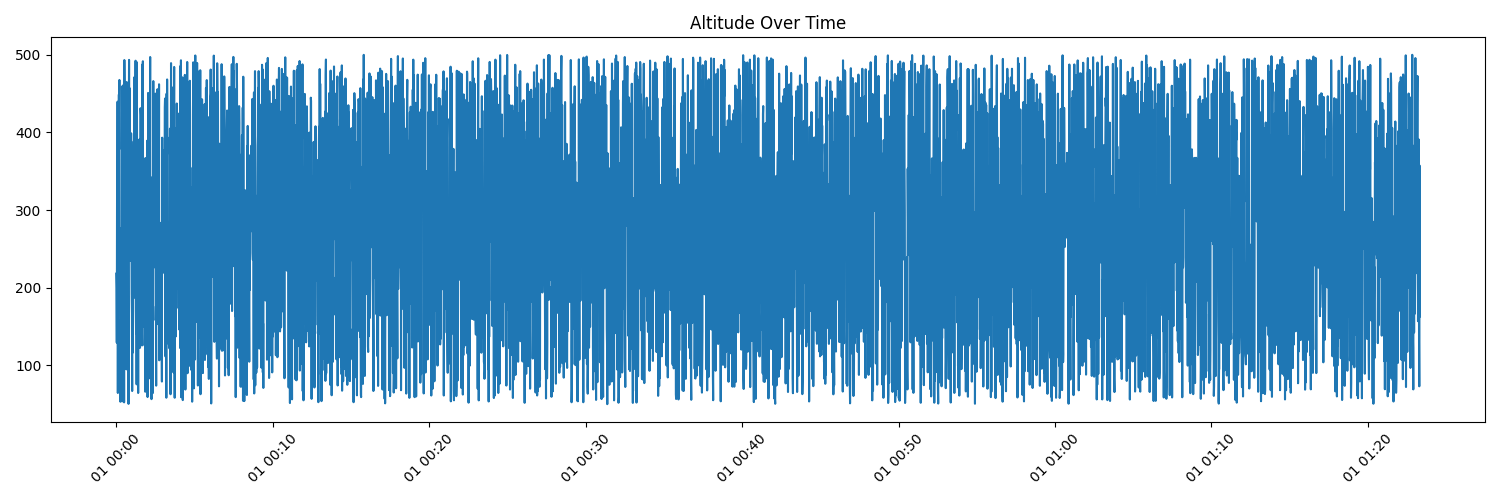

In [12]:
# Create time series plots
plt.figure(figsize=(15, 5))
plt.plot(df['timestamp'], df['altitude'])
plt.title('Altitude Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

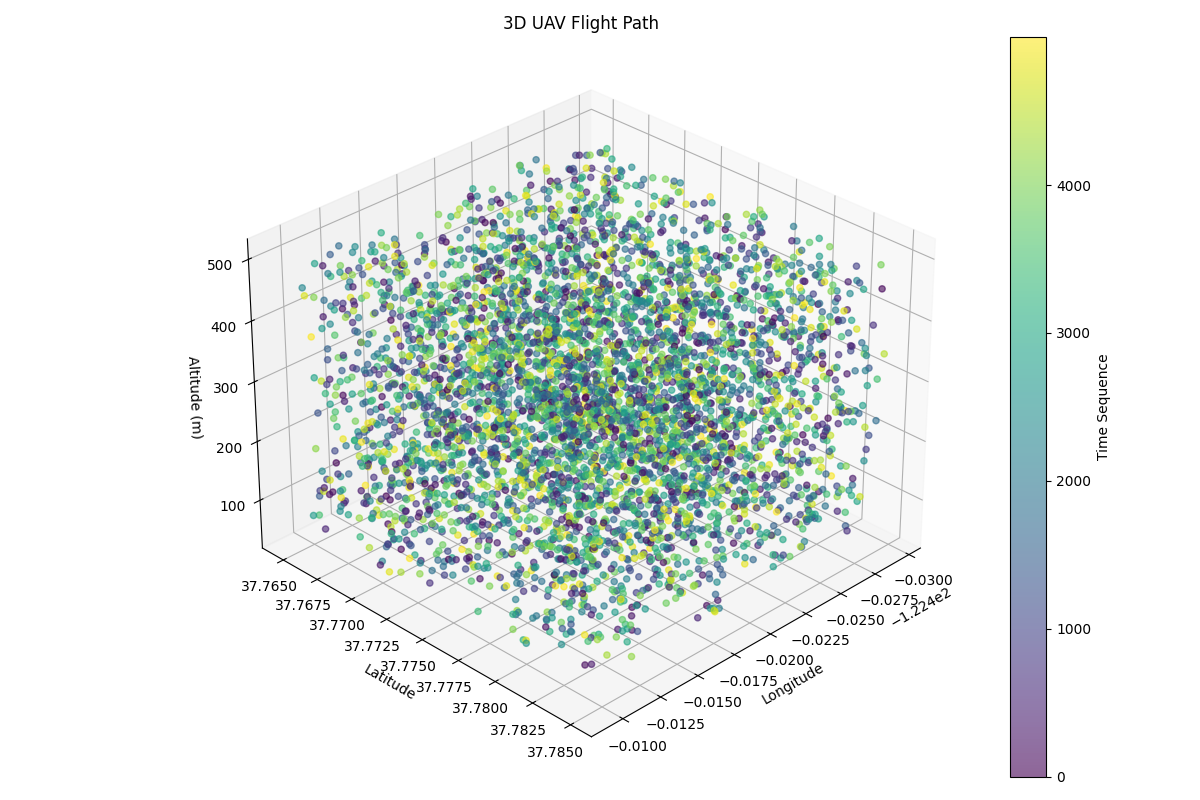

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure with 3D projection
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the UAV trajectory
scatter = ax.scatter(df['longitude'], 
                    df['latitude'], 
                    df['altitude'],
                    c=df.index,  # Color points by time sequence
                    cmap='viridis',
                    alpha=0.6)

# Add colorbar to show time progression
plt.colorbar(scatter, label='Time Sequence')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude (m)')
ax.set_title('3D UAV Flight Path')

# Add grid for better depth perception
ax.grid(True)

# Set initial viewing angle
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

# Optional: Create an animated rotation of the plot



In [14]:
#pip install ipympl

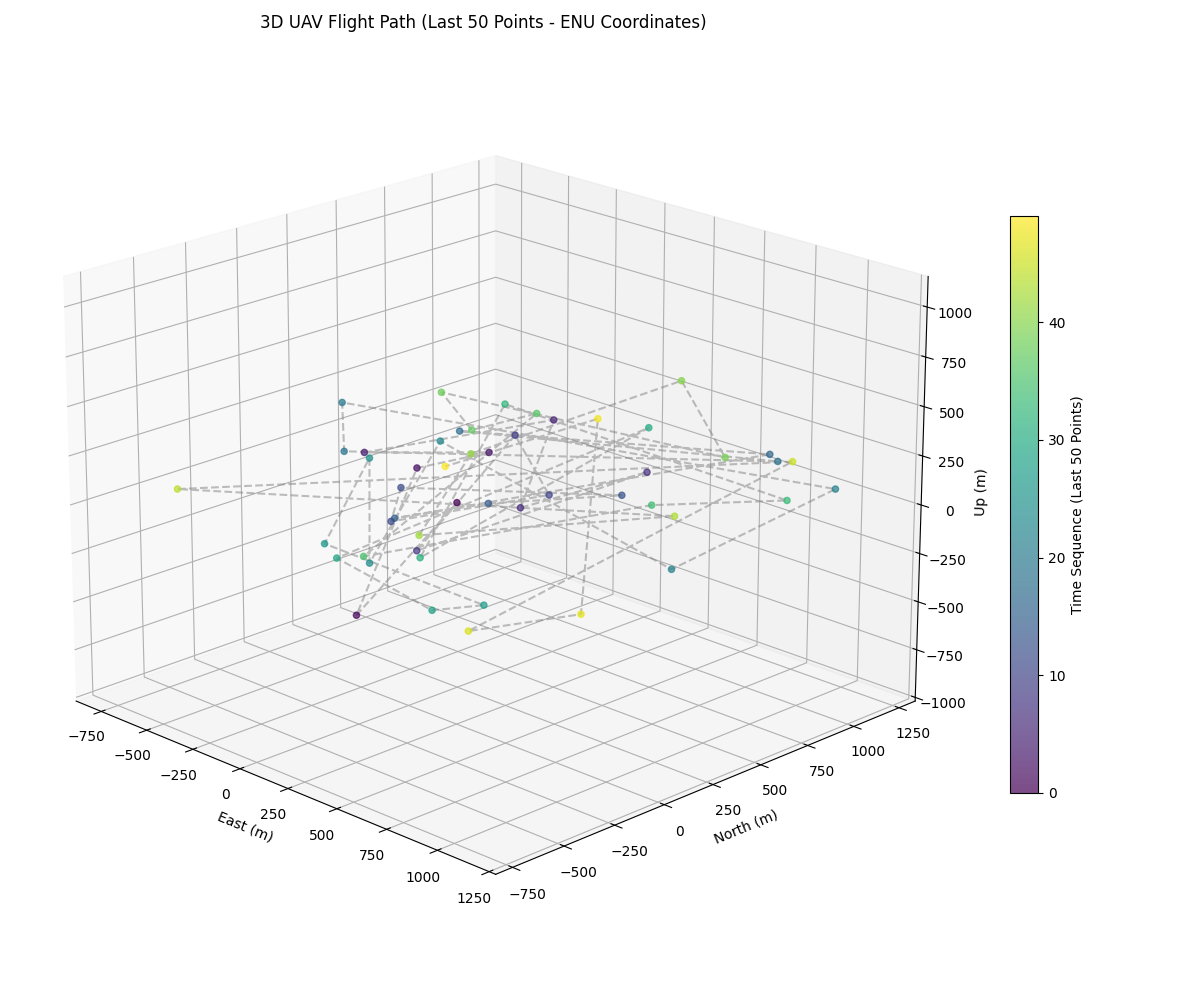

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- BƯỚC 1: TẢI DỮ LIỆU ---
df = pd.read_csv('../data/raw/uav_navigation_dataset.csv')


# --- BƯỚC 2: CHUYỂN ĐỔI TỌA ĐỘ GPS SANG HỆ TỌA ĐỘ CỤC BỘ (ENU - East, North, Up) ---
# Đây là bước quan trọng nhất bạn cần thực hiện.
# Bạn sẽ cần một điểm tham chiếu (ví dụ: điểm đầu tiên của quỹ đạo)
# và sử dụng các công thức hoặc thư viện (ví dụ: pyproj) để chuyển đổi.

# VÍ DỤ GIẢ ĐỊNH (BẠN CẦN THAY THẾ BẰNG LOGIC CHUYỂN ĐỔI THỰC TẾ):
# Giả sử bạn đã có hàm `gps_to_enu(lat, lon, alt, lat_ref, lon_ref, alt_ref)`
# Hoặc bạn tính toán thủ công sự thay đổi tương đối so với điểm đầu tiên (đơn giản hóa, không hoàn toàn chính xác cho khoảng cách lớn)

# Lấy điểm tham chiếu là điểm đầu tiên của TOÀN BỘ DataFrame
# Điều này quan trọng để hệ tọa độ cục bộ nhất quán
lat_ref = df['latitude'].iloc[0]
lon_ref = df['longitude'].iloc[0]
alt_ref = df['altitude'].iloc[0]

# Tạo các cột x, y, z mới (ĐƠN VỊ NÊN LÀ MÉT)
# Đây là phần CỰC KỲ QUAN TRỌNG và cần chính xác
# Ví dụ rất đơn giản (chỉ mang tính minh họa, không chính xác về mặt địa lý cho khoảng cách lớn):
R_earth = 6371000 # Bán kính Trái Đất bằng mét
df['x_enu'] = (df['longitude'] - lon_ref) * np.pi/180 * R_earth * np.cos(df['latitude'] * np.pi/180)
df['y_enu'] = (df['latitude'] - lat_ref) * np.pi/180 * R_earth
df['z_enu'] = df['altitude'] - alt_ref # Độ cao so với điểm bắt đầu

# SAU KHI CÓ df['x_enu'], df['y_enu'], df['z_enu'] VỚI ĐƠN VỊ LÀ MÉT:

# --- BƯỚC 3: LẤY 50 ĐIỂM DỮ LIỆU CUỐI CÙNG ĐỂ VẼ ---
df_plot = df.tail(50).copy() # Thay đổi từ head(100) thành tail(50)

# --- BƯỚC 4: TRỰC QUAN HÓA DỮ LIỆU ĐÃ CHUYỂN ĐỔI ---
# Kích hoạt backend tương tác cho Jupyter Notebook (chạy ở cell riêng trước)
# %matplotlib notebook
# hoặc
# %matplotlib widget

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Màu sắc theo thứ tự của 50 điểm cuối
# Nếu bạn muốn màu sắc phản ánh chỉ số gốc trong df, bạn có thể dùng df_plot.index
time_colors = range(len(df_plot)) # Hoặc time_colors = df_plot.index nếu muốn index gốc

scatter = ax.scatter(df_plot['x_enu'],  # Sử dụng tọa độ x đã chuyển đổi
                     df_plot['y_enu'],  # Sử dụng tọa độ y đã chuyển đổi
                     df_plot['z_enu'],  # Sử dụng tọa độ z đã chuyển đổi
                     c=time_colors,
                     cmap='viridis',
                     alpha=0.7,
                     s=20)

# Vẽ đường nối các điểm để dễ hình dung quỹ đạo hơn
ax.plot(df_plot['x_enu'],
        df_plot['y_enu'],
        df_plot['z_enu'],
        color='grey', alpha=0.5, linestyle='--')


plt.colorbar(scatter, label='Time Sequence (Last 50 Points)', shrink=0.6) # Cập nhật label

ax.set_xlabel('East (m)') # Nhãn trục đã thay đổi
ax.set_ylabel('North (m)') # Nhãn trục đã thay đổi
ax.set_zlabel('Up (m)')    # Nhãn trục đã thay đổi
ax.set_title('3D UAV Flight Path (Last 50 Points - ENU Coordinates)') # Cập nhật tiêu đề
ax.grid(True)

# Cố gắng đặt tỷ lệ các trục cho gần bằng nhau
x_vals = df_plot['x_enu']
y_vals = df_plot['y_enu']
z_vals = df_plot['z_enu']

# Kiểm tra xem các mảng có rỗng không trước khi tính toán min/max
if not x_vals.empty and not y_vals.empty and not z_vals.empty:
    max_val_range = np.array([x_vals.max()-x_vals.min() if not x_vals.empty else 0,
                          y_vals.max()-y_vals.min() if not y_vals.empty else 0,
                          z_vals.max()-z_vals.min() if not z_vals.empty else 0]).max()
    if max_val_range == 0: max_val_range = 1.0 # Tránh chia cho 0 nếu tất cả các điểm trùng nhau

    mid_x = (x_vals.max()+x_vals.min()) * 0.5 if not x_vals.empty else 0
    mid_y = (y_vals.max()+y_vals.min()) * 0.5 if not y_vals.empty else 0
    mid_z = (z_vals.max()+z_vals.min()) * 0.5 if not z_vals.empty else 0

    ax.set_xlim(mid_x - max_val_range * 0.5, mid_x + max_val_range * 0.5)
    ax.set_ylim(mid_y - max_val_range * 0.5, mid_y + max_val_range * 0.5)
    ax.set_zlim(mid_z - max_val_range * 0.5, mid_z + max_val_range * 0.5)
else:
    print("Warning: Not enough data points in df_plot to determine axis limits.")


ax.view_init(elev=20, azim=-45) # Điều chỉnh góc nhìn
plt.tight_layout()
plt.show()


In [22]:
# Giả sử df đã có các cột x_enu, y_enu, z_enu chính xác bằng mét
df_analysis = df.copy() # Làm việc trên một bản sao để không ảnh hưởng df gốc

# Sắp xếp lại theo timestamp để đảm bảo diff() hoạt động đúng nếu chưa sắp xếp
df_analysis = df_analysis.sort_values(by='timestamp')

df_analysis['dx_enu'] = df_analysis['x_enu'].diff()
df_analysis['dy_enu'] = df_analysis['y_enu'].diff()
df_analysis['dz_enu'] = df_analysis['z_enu'].diff()

# Khoảng cách di chuyển giữa các điểm liên tiếp (trong 1 giây)
df_analysis['distance_per_second'] = np.sqrt(
    df_analysis['dx_enu']**2 +
    df_analysis['dy_enu']**2 +
    df_analysis['dz_enu']**2
)

# Xem xét 50 điểm cuối (hoặc toàn bộ nếu muốn)
points_to_analyze = df_analysis.tail(50) # Hoặc df_analysis nếu muốn xem toàn bộ

print("Phân tích khoảng cách di chuyển mỗi giây (mét):")
print(points_to_analyze[['timestamp', 'x_enu', 'y_enu', 'z_enu', 'distance_per_second']].head(10)) # In 10 điểm đầu của 50 điểm cuối
print("\nThống kê về distance_per_second (cho 50 điểm cuối):")
print(points_to_analyze['distance_per_second'].describe())

# Tìm những điểm có khoảng cách di chuyển bất thường lớn
threshold_suspicious_jump = 50 # mét/giây (ví dụ, UAV khó có thể bay nhanh hơn 50m/s = 180km/h một cách đột ngột)
suspicious_jumps = points_to_analyze[points_to_analyze['distance_per_second'] > threshold_suspicious_jump]
if not suspicious_jumps.empty:
    print(f"\nCẢNH BÁO: Tìm thấy {len(suspicious_jumps)} điểm có bước nhảy lớn hơn {threshold_suspicious_jump} m/s:")
    print(suspicious_jumps[['timestamp', 'distance_per_second']])
else:
    print(f"\nKhông tìm thấy bước nhảy nào lớn hơn {threshold_suspicious_jump} m/s trong các điểm phân tích.")

Phân tích khoảng cách di chuyển mỗi giây (mét):
                timestamp       x_enu       y_enu       z_enu  \
4950  2023-01-01 01:22:30  208.822875   45.619318   88.969836   
4951  2023-01-01 01:22:31  490.629020 -718.934489 -100.648707   
4952  2023-01-01 01:22:32  -11.434952   60.792829  184.622203   
4953  2023-01-01 01:22:33 -250.175168  665.426270  -18.536895   
4954  2023-01-01 01:22:34 -399.795479  168.594341   97.965797   
4955  2023-01-01 01:22:35  -77.622632  832.678832  153.899288   
4956  2023-01-01 01:22:36  612.046076  -39.046520  231.930585   
4957  2023-01-01 01:22:37  638.187924  578.667343  207.965978   
4958  2023-01-01 01:22:38  480.400398 -418.360490  105.600694   
4959  2023-01-01 01:22:39 -280.542299  833.582370    6.638563   

      distance_per_second  
4950          1016.088538  
4951           836.607685  
4952           970.269249  
4953           681.066889  
4954           531.790447  
4955           740.224364  
4956          1114.287619  
4957        

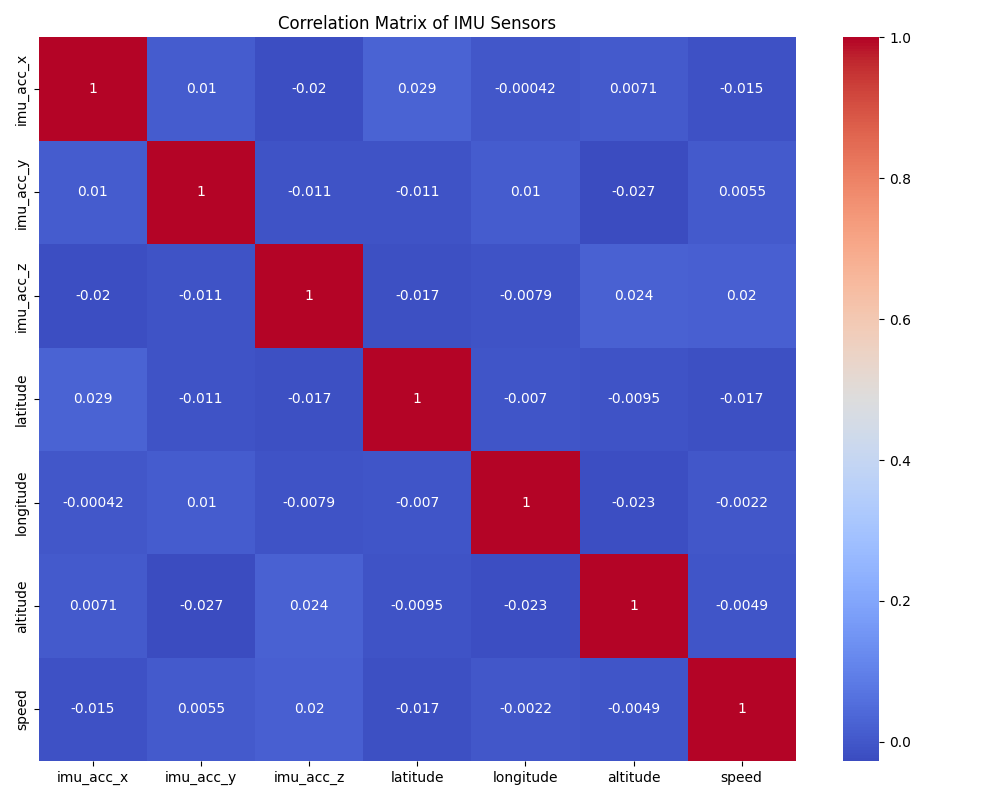

In [16]:
# Create correlation matrix for sensor readings
sensor_cols = ['imu_acc_x', 'imu_acc_y', 'imu_acc_z', 
               'latitude', 'longitude', 'altitude','speed']

plt.figure(figsize=(10, 8))
sns.heatmap(df[sensor_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of IMU Sensors')
plt.tight_layout()
plt.show()

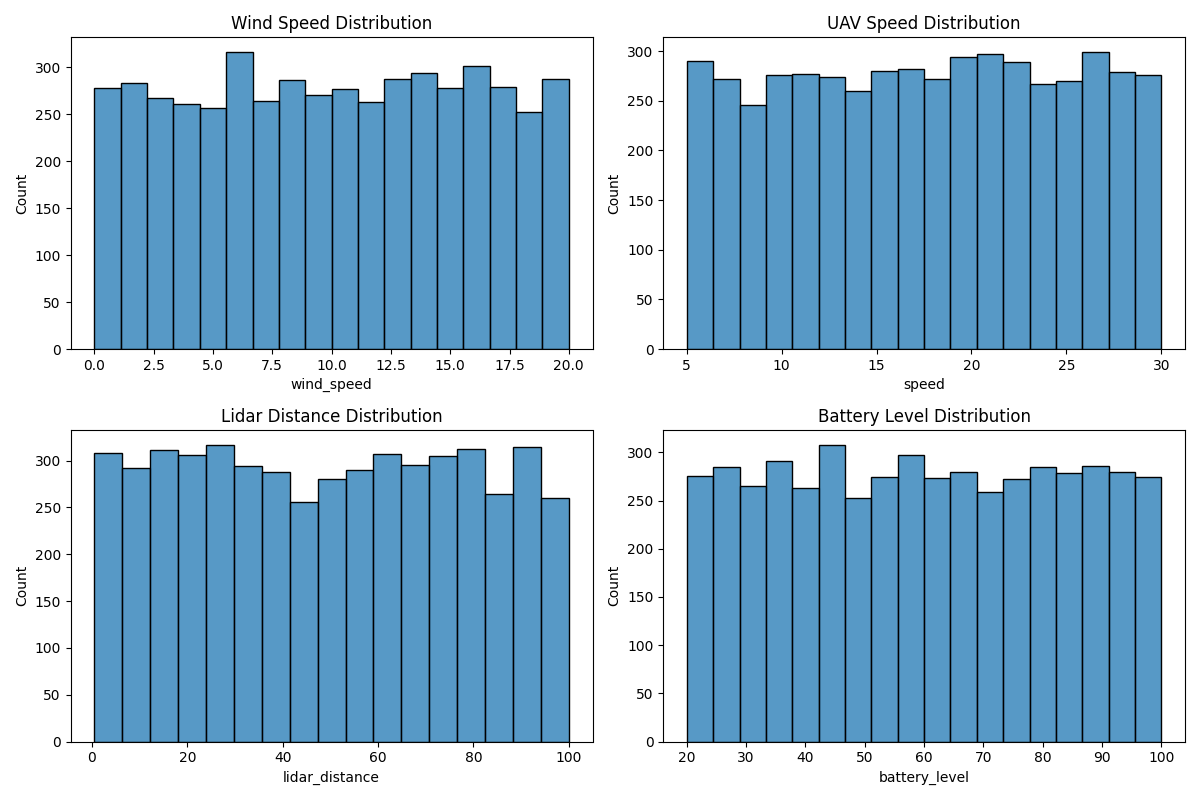

In [17]:
# Distribution of environmental variables
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df['wind_speed'], ax=axes[0,0])
axes[0,0].set_title('Wind Speed Distribution')

sns.histplot(df['speed'], ax=axes[0,1])
axes[0,1].set_title('UAV Speed Distribution')

sns.histplot(df['lidar_distance'], ax=axes[1,0])
axes[1,0].set_title('Lidar Distance Distribution')

sns.histplot(df['battery_level'], ax=axes[1,1])
axes[1,1].set_title('Battery Level Distribution')

plt.tight_layout()
plt.show()

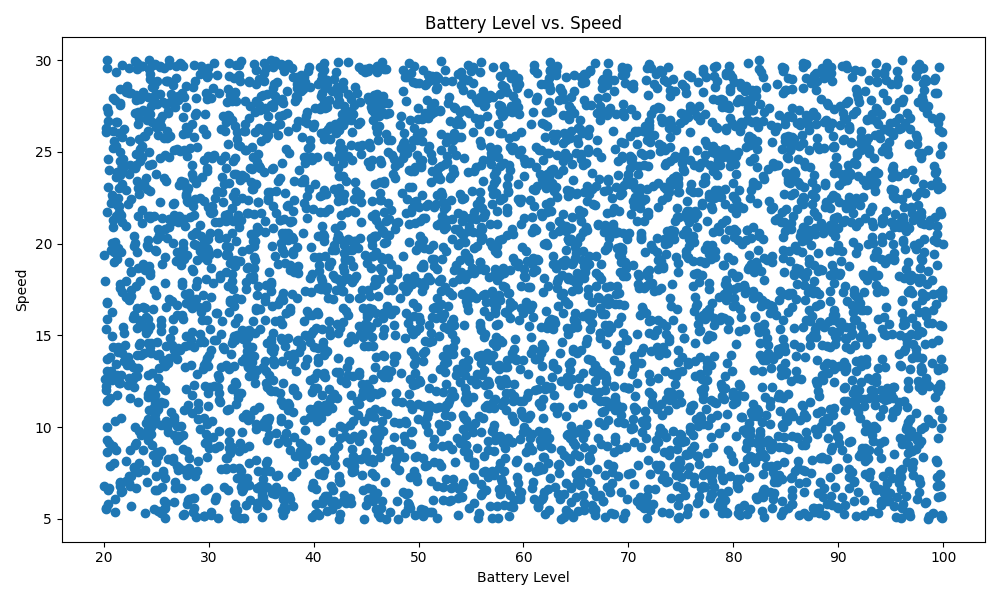

In [18]:
# Battery level vs. speed scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['battery_level'], df['speed'])
plt.title('Battery Level vs. Speed')
plt.xlabel('Battery Level')
plt.ylabel('Speed')
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd

def identify_trajectories(df, timestamp_col='timestamp', time_threshold_seconds=60):
    """
    Phân tách DataFrame thành các quỹ đạo riêng lẻ dựa trên khoảng nghỉ trong timestamp.

    Args:
        df (pd.DataFrame): DataFrame chứa dữ liệu, bao gồm cột timestamp.
        timestamp_col (str): Tên của cột chứa timestamp.
        time_threshold_seconds (int): Ngưỡng thời gian (giây) để xác định một khoảng nghỉ lớn.
                                      Nếu chênh lệch thời gian giữa hai điểm liên tiếp
                                      lớn hơn ngưỡng này, một quỹ đạo mới sẽ được bắt đầu.

    Returns:
        pd.DataFrame: DataFrame gốc với một cột mới 'trajectory_id' được thêm vào,
                      đánh dấu các quỹ đạo riêng lẻ.
    """
    # Đảm bảo cột timestamp là kiểu datetime
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])

    # Sắp xếp DataFrame theo timestamp (quan trọng nếu dữ liệu chưa được sắp xếp)
    df = df.sort_values(by=timestamp_col).reset_index(drop=True)

    # Tính toán chênh lệch thời gian giữa các hàng liên tiếp
    # .dt.total_seconds() để chuyển timedelta sang giây
    df['time_diff_seconds'] = df[timestamp_col].diff().dt.total_seconds()

    # Điểm đầu tiên của dataset luôn bắt đầu một quỹ đạo mới
    # Nên gán time_diff_seconds của hàng đầu tiên là một giá trị lớn hơn threshold
    # hoặc xử lý nó như một trường hợp đặc biệt.
    # Ở đây, ta sẽ gán nó bằng một giá trị lớn để đảm bảo nó bắt đầu quỹ đạo 0.
    if not df.empty:
        df.loc[0, 'time_diff_seconds'] = time_threshold_seconds + 1

    # Xác định các điểm bắt đầu quỹ đạo mới
    # Một quỹ đạo mới bắt đầu khi time_diff_seconds > time_threshold_seconds
    df['new_trajectory_start'] = df['time_diff_seconds'] > time_threshold_seconds

    # Tạo trajectory_id bằng cách tính tổng tích lũy của new_trajectory_start
    # Mỗi khi new_trajectory_start là True (1), trajectory_id sẽ tăng lên
    df['trajectory_id'] = df['new_trajectory_start'].cumsum() -1 # trừ 1 để bắt đầu từ 0

    # Xóa các cột tạm thời không cần thiết nữa (tùy chọn)
    # df = df.drop(columns=['time_diff_seconds', 'new_trajectory_start'])

    return df

# --- Cách sử dụng ---
# Giả sử file CSV của bạn tên là 'uav_navigation_dataset.csv'
try:
    uav_df = pd.read_csv('../data/raw/uav_navigation_dataset.csv')

    # Xem qua vài dòng đầu và thông tin cột để chắc chắn tên cột timestamp
    print("Thông tin ban đầu của DataFrame:")
    print(uav_df.head())
    print("\nThông tin cột:")
    uav_df.info()
    print("-" * 30)

    # Chọn một ngưỡng thời gian hợp lý để xác định khoảng nghỉ.
    # Ví dụ: nếu UAV nghỉ hơn 5 phút (300 giây) thì coi là một chuyến bay mới.
    # Hoặc nếu bạn biết rằng các chuyến bay thường cách nhau ít nhất vài giờ.
    # Dựa trên dữ liệu mẫu bạn gửi (mỗi giây một điểm),
    # một khoảng nghỉ lớn có thể là vài chục giây hoặc vài phút.
    # Hãy bắt đầu với một ngưỡng, ví dụ 60 giây (1 phút).
    # Bạn cần điều chỉnh ngưỡng này dựa trên hiểu biết của bạn về dữ liệu.
    threshold_for_new_flight = 60  # giây

    # Phân tách quỹ đạo
    uav_df_with_traj_id = identify_trajectories(uav_df.copy(),
                                               timestamp_col='timestamp',
                                               time_threshold_seconds=threshold_for_new_flight)

    # Xem kết quả
    print(f"\nDataFrame sau khi thêm trajectory_id (ngưỡng: {threshold_for_new_flight} giây):")
    print(uav_df_with_traj_id[['timestamp', 'time_diff_seconds', 'new_trajectory_start', 'trajectory_id']].head(20)) # In 20 dòng đầu
    print("-" * 30)

    num_trajectories = uav_df_with_traj_id['trajectory_id'].nunique()
    print(f"Số lượng quỹ đạo riêng lẻ được xác định: {num_trajectories}")

    # Bây giờ bạn có thể lặp qua từng trajectory_id để xử lý hoặc trực quan hóa
    if num_trajectories < 20: # Chỉ in nếu số lượng quỹ đạo không quá lớn
        for traj_id in range(num_trajectories):
            single_trajectory_df = uav_df_with_traj_id[uav_df_with_traj_id['trajectory_id'] == traj_id]
            print(f"\nQuỹ đạo {traj_id} có {len(single_trajectory_df)} điểm dữ liệu.")
            # Tại đây bạn có thể thực hiện trực quan hóa 3D cho single_trajectory_df
            # Ví dụ:
            # import matplotlib.pyplot as plt
            # from mpl_toolkits.mplot3d import Axes3D
            # fig = plt.figure()
            # ax = fig.add_subplot(111, projection='3d')
            # ax.plot(single_trajectory_df['longitude'], single_trajectory_df['latitude'], single_trajectory_df['altitude'])
            # ax.set_xlabel('Longitude')
            # ax.set_ylabel('Latitude')
            # ax.set_zlabel('Altitude')
            # plt.title(f'Trajectory {traj_id}')
            # plt.show()

except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'uav_navigation_dataset.csv'. Vui lòng kiểm tra lại đường dẫn.")
except KeyError as e:
    print(f"Lỗi: Không tìm thấy cột trong DataFrame. Có thể tên cột 'timestamp' không chính xác. Lỗi: {e}")
except Exception as e:
    print(f"Đã xảy ra lỗi không xác định: {e}")

Thông tin ban đầu của DataFrame:
             timestamp   latitude   longitude    altitude  imu_acc_x  \
0  2023-01-01 00:00:00  37.772391 -122.421527  218.138368  -0.001979   
1  2023-01-01 00:00:01  37.783914 -122.419931  199.810443   1.480481   
2  2023-01-01 00:00:02  37.779540 -122.412309  129.269261   0.376001   
3  2023-01-01 00:00:03  37.776873 -122.422600  323.270002  -2.500185   
4  2023-01-01 00:00:04  37.768020 -122.412007  264.480872  -1.886519   

   imu_acc_y  imu_acc_z  imu_gyro_x  imu_gyro_y  imu_gyro_z  lidar_distance  \
0   1.379990  -2.445775   49.732045   39.381347  -72.391665       33.328274   
1  -1.892928  -2.635478  -14.654717 -165.994752 -145.865601       81.765473   
2  -0.920162   0.625152  167.219469   40.413723 -134.510679       99.440493   
3   0.979684   2.796698 -101.167758 -147.719302 -114.958394       84.155773   
4  -0.107464   0.016328   31.628310   75.723926 -106.684800       34.941221   

       speed  wind_speed  battery_level  obstacle_detected 